In [5]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_42641_U')

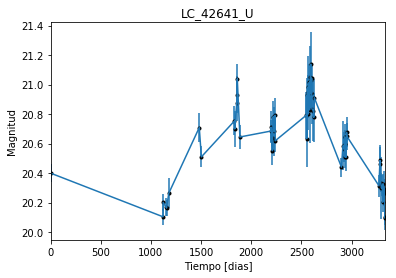

In [6]:
data = np.genfromtxt('LC_42641_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_42641_U')

In [7]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [8]:
%%capture capt
sample = model.run_mcmc(20000)

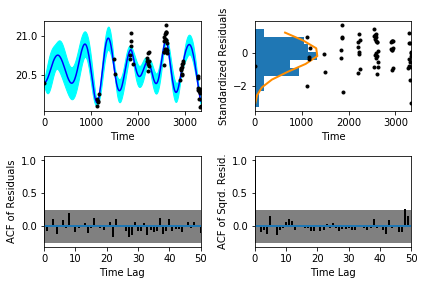

In [9]:
sample.assess_fit()

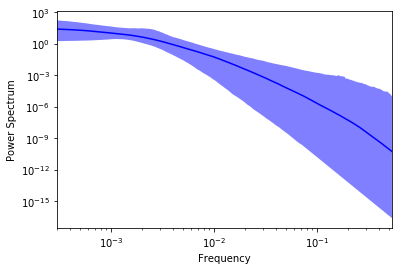

In [10]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [11]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_42641_U')

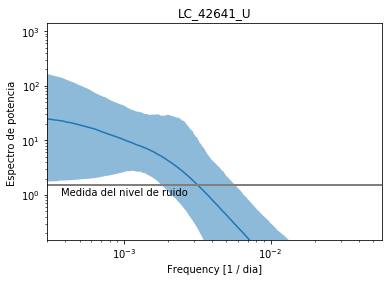

In [12]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_42641_U')

Text(0.5,1,'Prediccion , valor esperado LC_42641_U')

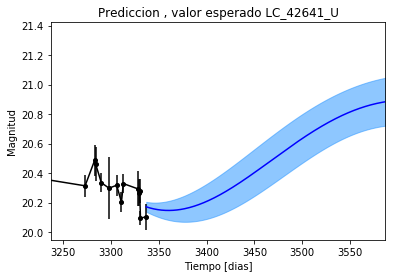

In [13]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_42641_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_42641_U')

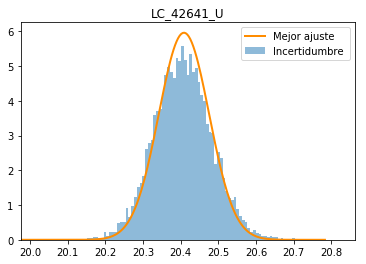

In [14]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_42641_U')

Text(0.5,1,'Interpolacion, camino simulado LC_42641_U')

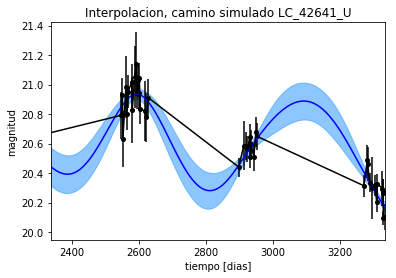

In [15]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_42641_U')

Text(0.5,1,'Interpolacion, camino simulado LC_42641_U')

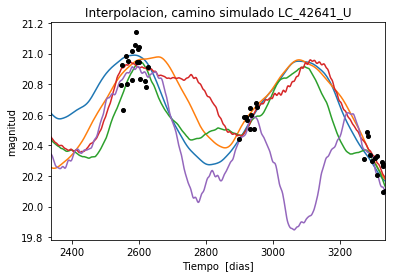

In [16]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_42641_U')

In [17]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [18]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 651.888055162
Median: 0.0112620218654
Standard deviation: 0.210136324821
68% credibility interval: [ 0.001035    0.20634191]
95% credibility interval: [  3.70806195e-04   8.12954797e-01]
99% credibility interval: [  3.12713800e-04   1.00553570e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 575.695426132
Median: 0.00327868086886
Standard deviation: 0.0902956840516
68% credibility interval: [ 0.00062382  0.03416967]
95% credibility interval: [ 0.00033766  0.27934417]
99% credibility interval: [  3.08497421e-04   6.52209975e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 362.151876894
Median: 0.0182501986454
Standard 

In [19]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1813.9182291
Median: 70.039008836
Standard deviation: 1.65950634524
68% credibility interval: [ 68.21112741  71.19527058]
95% credibility interval: [ 65.65042507  72.05031292]
99% credibility interval: [ 63.48631281  73.0578506 ]


In [20]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 381.861713813
Median: 0.599333420656
Standard deviation: 2.30147662083
68% credibility interval: [ 0.05811346  3.98446471]
95% credibility interval: [ 0.01576302  7.89500455]
99% credibility interval: [  9.75832195e-03   1.09202772e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 1378.94293207
Median: 0.637354822066
Standard deviation: 9.16350998468
68% credibility interval: [ 0.02431244  9.24226321]
95% credibility interval: [  1.2

In [21]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1342.71848918
Median: 5.73640819334e-17
Standard deviation: 4.2854207162e+33
68% credibility interval: [  2.54382771e-48   6.14596429e-05]
95% credibility interval: [  1.64774636e-72   6.43098788e+06]
99% credibility interval: [  8.75984227e-82   3.44929938e+30]


In [22]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3154.43135743
Median: 20.5047488361
Standard deviation: 0.13744148354
68% credibility interval: [ 20.38019763  20.60890571]
95% credibility interval: [ 20.1982577   20.72955633]
99% credibility interval: [ 19.99206079  20.88308977]


In [23]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 345.985118174
Median: 0.0191245542348
Standard deviation: 0.243441708747
68% credibility interval: [ 0.          0.36168964]
95% credibility interval: [ 0.          0.87788848]
99% credibility interval: [ 0.          1.01988493]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 345.985118174
Median: 0.0191245542348
Standard deviation: 0.243441708747
68% credibility interval: [ 0.          0.36168964]
95% credibility interval: [ 0.          0.87788848]
99% credibility interval: [ 0.          1.01988493]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 482.118500098
Median: 0.0
Standard deviation: 0.00090013707733
68% cre

In [24]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1813.9182291
Median: 70.039008836
Standard deviation: 1.65950634524
68% credibility interval: [ 68.21112741  71.19527058]
95% credibility interval: [ 65.65042507  72.05031292]
99% credibility interval: [ 63.48631281  73.0578506 ]


In [25]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 4749.26084541
Median: 0.0768512452569
Standard deviation: 0.10740583016
68% credibility interval: [ 0.04714166  0.13839132]
95% credibility interval: [ 0.03167943  0.30041759]
99% credibility interval: [ 0.02442921  0.53932849]


In [26]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1838.36967536
Median: 0.910339739491
Standard deviation: 0.142869385445
68% credibility interval: [ 0.77894466  1.05782806]
95% credibility interval: [ 0.67729042  1.23693275]
99% credibility interval: [ 0.61750779  1.35596446]


In [27]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 816.769353106
Median: 0.000646338312498
Standard deviation: 0.205055209099
68% credibility interval: [  8.21874496e-06   1.91146095e-02]
95% credibility interval: [  3.41078405e-11   3.31552495e-01]
99% credibility interval: [  1.89828578e-34   1.42989839e+00]


In [28]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 651.888055162
Median: (-0.0707613703141+0j)
Standard deviation: 2.02061945364
68% credibility interval: [-1.29648448-0.39630046j -0.00650309-3.24317309j]
95% credibility interval: [ -5.10794563e+00+0.j          -2.32984404e-03-1.64164839j]
99% credibility interval: [ -6.31796713e+00+0.j          -1.96483875e-03-0.01298073j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 575.695426132
Median: (-0.0206005594622+2.2469841902j)
Standard deviation: 1.63141761435
68% credibility interval: [-0.21469437+1.49655832j -0.00391955+6.17799573j]
95% credibility interval: [-1.75517117+5.35193177j -0.00212159+0.j        ]
99% credibility interval: [ -4.09795613e+00+2.17509138j  -1.93834646e-03+0.j        ]
Posterior summary for param